In [93]:
import pandas as pd

In [94]:
# import data
ratings = pd.read_csv("first_150_movie_ratings.csv")
ratings.head()

,Unnamed: 0,CustomerID,Rating,Date,Movie_Id
0,1,1488844,3.0,2005-09-06,1
1,2,822109,5.0,2005-05-13,1
2,3,885013,4.0,2005-10-19,1
3,4,30878,4.0,2005-12-26,1
4,5,823519,3.0,2004-05-03,1


<AxesSubplot:>

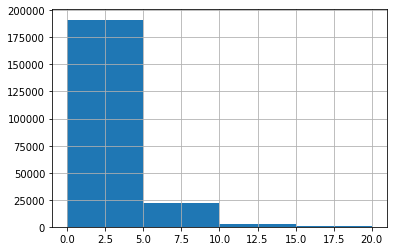

In [95]:
# See number of ratings that users did
ratings_per_userID = ratings.groupby("CustomerID").count().sort_values("Rating")['Rating']
ratings_per_userID.hist(bins=[0,5,10,15,20])

In [96]:
# the number of users still left after selecting users that did at least 5 ratings
sum(ratings_per_userID >= 5)

25673

In [97]:
# Creating Edge list

# Filter users with multiple ratings done
user_id_with_more_than_5_ratings = ratings_per_userID[ratings_per_userID >= 5].index
user_id_with_more_than_5_ratings = set(user_id_with_more_than_5_ratings)
ratings_for_active_users = ratings[ratings["CustomerID"].isin(user_id_with_more_than_5_ratings)]

# Select ratings of users with at least 5 ratings
connections = ratings_for_active_users[ratings_for_active_users["Rating"] >= 5]

edge_list = connections.loc[:,["CustomerID", "Movie_Id"]]
edge_list.rename(columns={'CustomerID': 'customer',
                   'Movie_Id': 'movie'},
          inplace=True, errors='raise')


In [98]:
# Creating Node list
customer_ids = edge_list["customer"].unique()
movie_ids = edge_list["movie"].unique()

node_list_customers = pd.DataFrame(customer_ids, columns=['id'])
node_list_customers["type"] = 'customer'

node_list_movies = pd.DataFrame(movie_ids, columns=['id'])
node_list_movies["type"] = 'movie'

node_list = node_list_customers.append(node_list_movies)

In [100]:
node_list.to_csv('node_list.csv', index=False)
edge_list.to_csv('edge_list.csv', index=False)